# Libraries

In [80]:
import pandas as pd
import numpy as np

import missingno as mno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Dataset 

In [82]:
salaries_df = pd.read_csv('./salaries.csv')

In [83]:
salaries_df.head()

work_year experience_level employment_type                  job_title  \
0       2024               MI              FT  Machine Learning Engineer   
1       2024               MI              FT  Machine Learning Engineer   
2       2024               MI              FT          Software Engineer   
3       2024               MI              FT          Software Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  200200             USD         200200                 US             0   
1  186915             USD         186915                 US             0   
2  240240             USD         240240                 US             0   
3  221596             USD         221596                 US             0   
4  240240             USD         240240                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [84]:
salaries_df.tail()

work_year experience_level employment_type                 job_title  \
29557       2020               SE              FT            Data Scientist   
29558       2021               MI              FT  Principal Data Scientist   
29559       2020               EN              FT            Data Scientist   
29560       2020               EN              CT     Business Data Analyst   
29561       2021               SE              FT            Data Scientist   

        salary salary_currency  salary_in_usd employee_residence  \
29557   412000             USD         412000                 US   
29558   151000             USD         151000                 US   
29559   105000             USD         105000                 US   
29560   100000             USD         100000                 US   
29561  7000000             INR          94665                 IN   

       remote_ratio company_location company_size  
29557           100               US            L  
29558           100               US            L  
29559           100               US            S  
29560           100               US            L  
29561            50               IN            L

# Exploratory Data Analysis

In [86]:
salaries_df.head()

work_year experience_level employment_type                  job_title  \
0       2024               MI              FT  Machine Learning Engineer   
1       2024               MI              FT  Machine Learning Engineer   
2       2024               MI              FT          Software Engineer   
3       2024               MI              FT          Software Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  200200             USD         200200                 US             0   
1  186915             USD         186915                 US             0   
2  240240             USD         240240                 US             0   
3  221596             USD         221596                 US             0   
4  240240             USD         240240                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [87]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Summary of Data

In [89]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29562 entries, 0 to 29561
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           29562 non-null  int64 
 1   experience_level    29562 non-null  object
 2   employment_type     29562 non-null  object
 3   job_title           29562 non-null  object
 4   salary              29562 non-null  int64 
 5   salary_currency     29562 non-null  object
 6   salary_in_usd       29562 non-null  int64 
 7   employee_residence  29562 non-null  object
 8   remote_ratio        29562 non-null  int64 
 9   company_location    29562 non-null  object
 10  company_size        29562 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.5+ MB


In [90]:
salaries_df.memory_usage()

Index                    132
work_year             236496
experience_level      236496
employment_type       236496
job_title             236496
salary                236496
salary_currency       236496
salary_in_usd         236496
employee_residence    236496
remote_ratio          236496
company_location      236496
company_size          236496
dtype: int64

## Descriptive Analysis

In [92]:
salaries_df.describe().T

count           mean            std      min       25%  \
work_year      29562.0    2023.567282       0.657533   2020.0    2023.0   
salary         29562.0  164172.452236  259398.732730  14000.0  106500.0   
salary_in_usd  29562.0  156262.504499   70767.667632  15000.0  106500.0   
remote_ratio   29562.0      25.260470      43.200518      0.0       0.0   

                    50%       75%         max  
work_year        2024.0    2024.0      2024.0  
salary         146300.0  198000.0  30400000.0  
salary_in_usd  146000.0  196900.0    800000.0  
remote_ratio        0.0      50.0       100.0

## Missing Values

In [94]:
missing_values = salaries_df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [95]:
perc_missing_values = missing_values / len(salaries_df) * 100
perc_missing_values


work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

<Axes: >

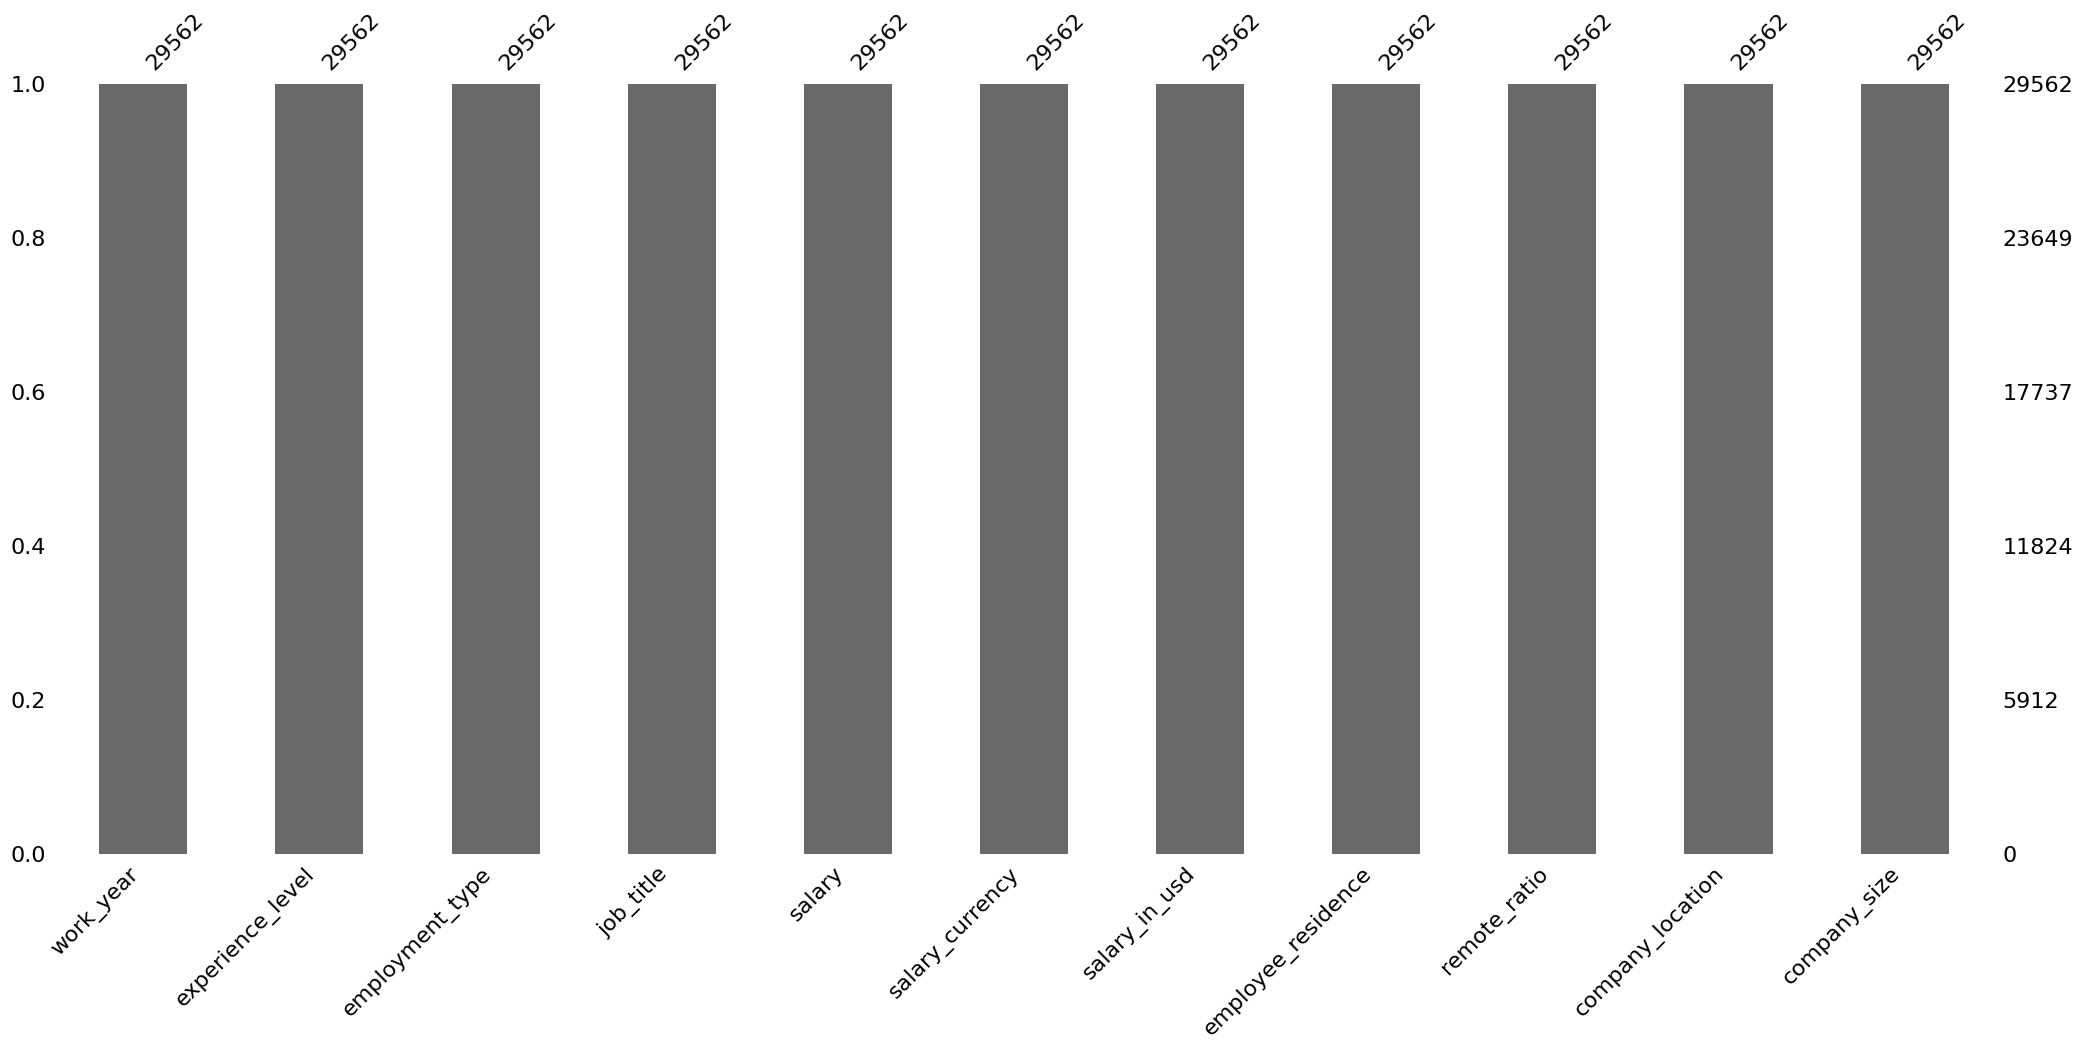

In [96]:
mno.bar(salaries_df)

In [97]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

# Visualizations

In [99]:
salaries_df.tail()

work_year experience_level employment_type                 job_title  \
29557       2020               SE              FT            Data Scientist   
29558       2021               MI              FT  Principal Data Scientist   
29559       2020               EN              FT            Data Scientist   
29560       2020               EN              CT     Business Data Analyst   
29561       2021               SE              FT            Data Scientist   

        salary salary_currency  salary_in_usd employee_residence  \
29557   412000             USD         412000                 US   
29558   151000             USD         151000                 US   
29559   105000             USD         105000                 US   
29560   100000             USD         100000                 US   
29561  7000000             INR          94665                 IN   

       remote_ratio company_location company_size  
29557           100               US            L  
29558           100               US            L  
29559           100               US            S  
29560           100               US            L  
29561            50               IN            L

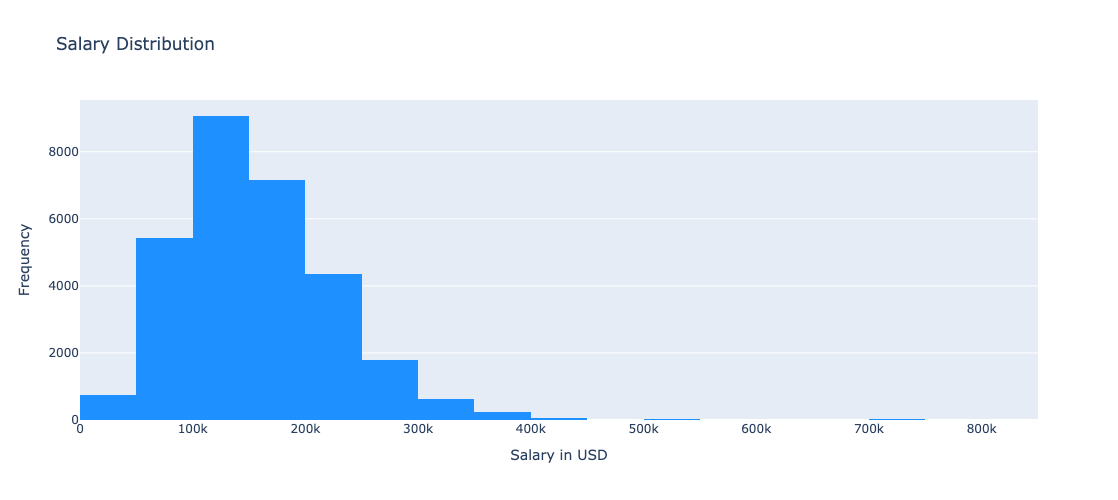

In [100]:
fig = px.histogram(
    salaries_df, 
    x="salary_in_usd", 
    nbins=20, 
    title="Salary Distribution", 
    labels={"salary_in_usd": "Salary in USD"},
    template="plotly"
)

fig.update_traces(marker_color="dodgerblue")  
fig.update_layout(
    width=900,  # Custom width
    height=500,  # Custom height
    xaxis_title="Salary in USD", 
    yaxis_title="Frequency"
)

fig.show()


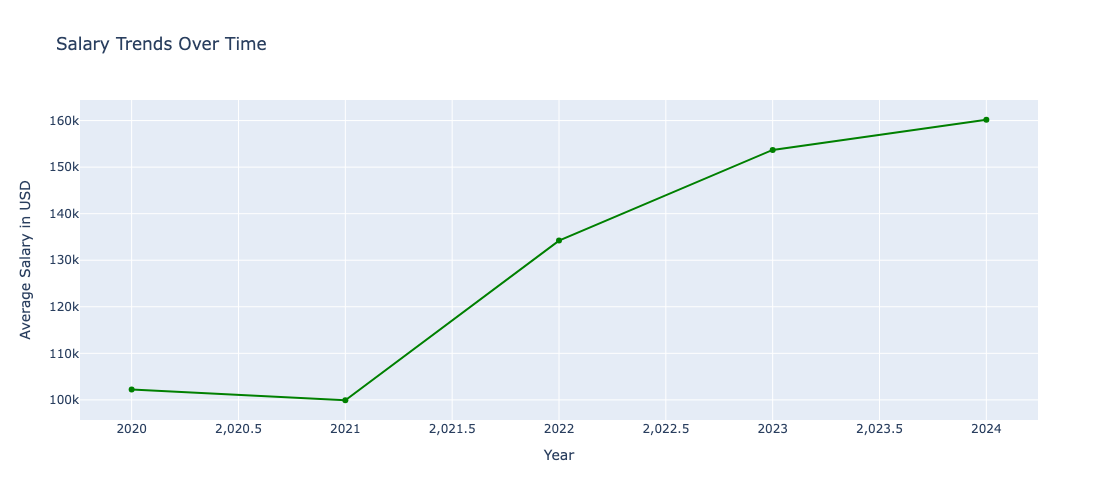

In [101]:
salaries_df_avg = salaries_df.groupby('work_year')['salary_in_usd'].mean().reset_index()

fig = px.line(
    salaries_df_avg, 
    x="work_year", 
    y="salary_in_usd", 
    title="Salary Trends Over Time",
    labels={"work_year": "Year", "salary_in_usd": "Average Salary in USD"},
    template="plotly"
)

# Add markers and customize line color
fig.update_traces(line_color="green", mode="lines+markers")
fig.update_layout(
    width=900, 
    height=500, 
    xaxis_title="Year", 
    yaxis_title="Average Salary in USD"
)
fig.show()

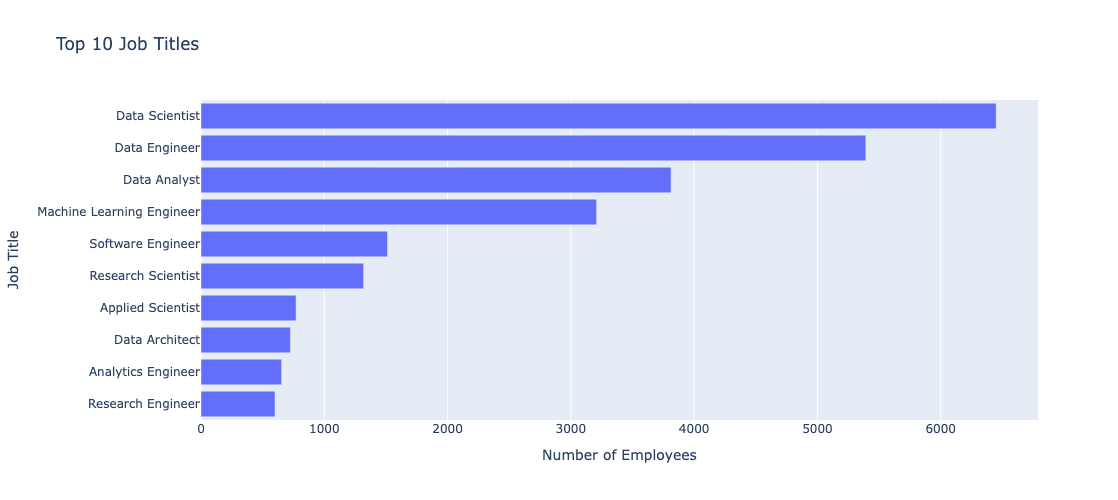

In [102]:
# Count job titles
top_jobs = salaries_df['job_title'].value_counts().head(10).reset_index()
top_jobs.columns = ['Job Title', 'Count']

# Plot bar chart
fig = px.bar(
    top_jobs, 
    x="Count", 
    y="Job Title", 
    orientation='h', 
    title="Top 10 Job Titles",
    labels={"Count": "Number of Employees", "Job Title": "Job Title"},
    template="plotly"
)
fig.update_layout(
    yaxis=dict(categoryorder="total ascending"),
    width=900, 
    height=500,
)
fig.show()

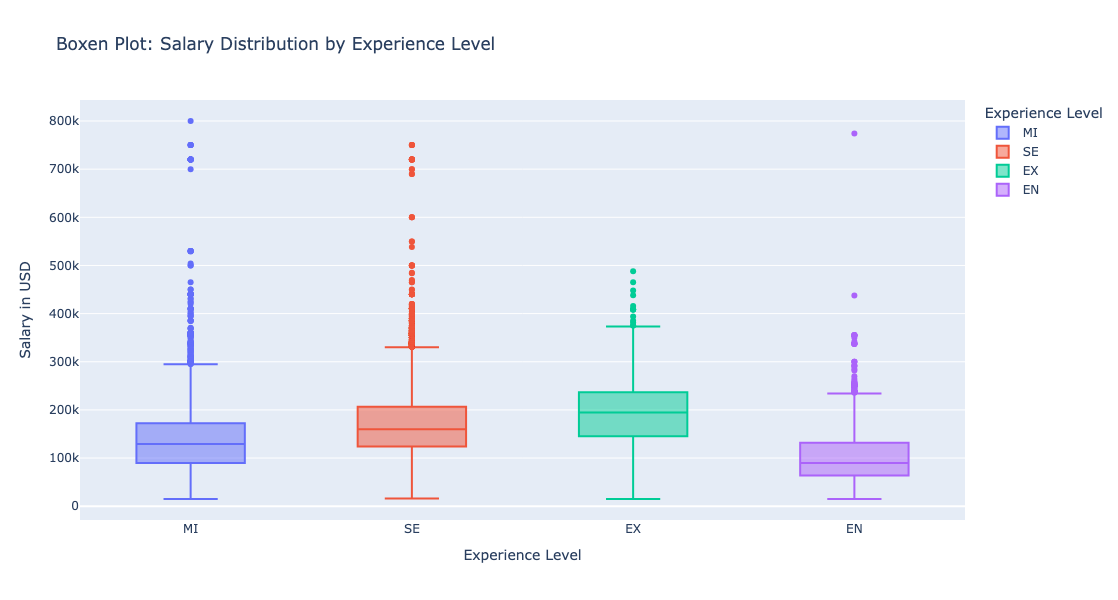

In [103]:
fig = px.box(
    salaries_df,
    x="experience_level",
    y="salary_in_usd",
    color="experience_level",
    title="Boxen Plot: Salary Distribution by Experience Level",
    labels={"experience_level": "Experience Level", "salary_in_usd": "Salary in USD"},
    template="plotly"
)
fig.update_layout(width=800, height=600)
fig.show()

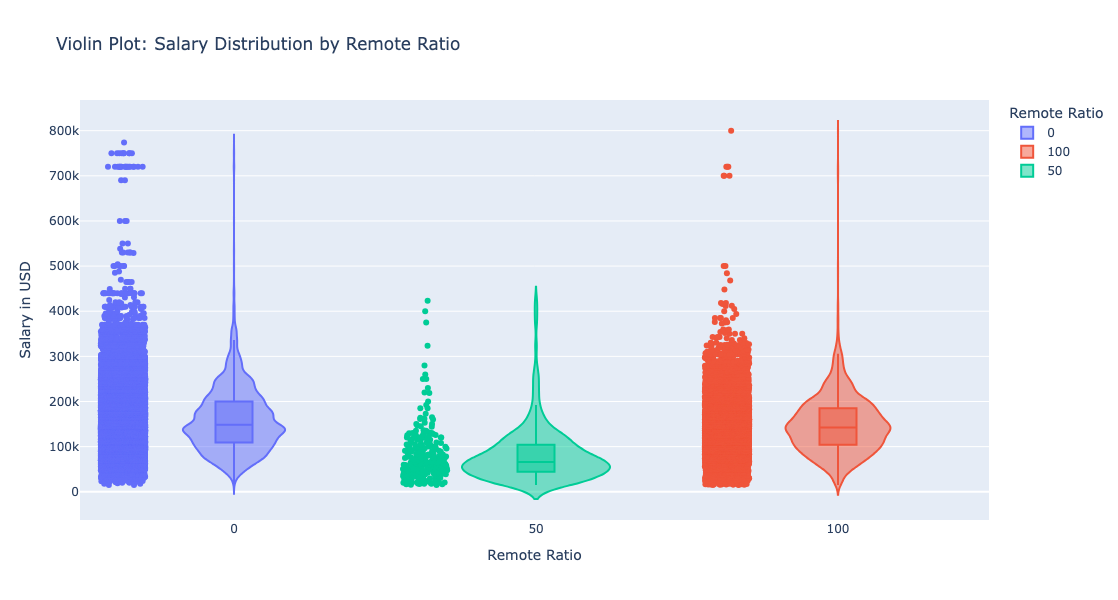

In [104]:
fig = px.violin(
    salaries_df,
    x="remote_ratio",
    y="salary_in_usd",
    color="remote_ratio",
    box=True,  # Add inner box plot
    points="all",  # Show all points
    title="Violin Plot: Salary Distribution by Remote Ratio",
    labels={"remote_ratio": "Remote Ratio", "salary_in_usd": "Salary in USD"},
    template="plotly"
)
fig.update_layout(width=800, height=600)
fig.show()

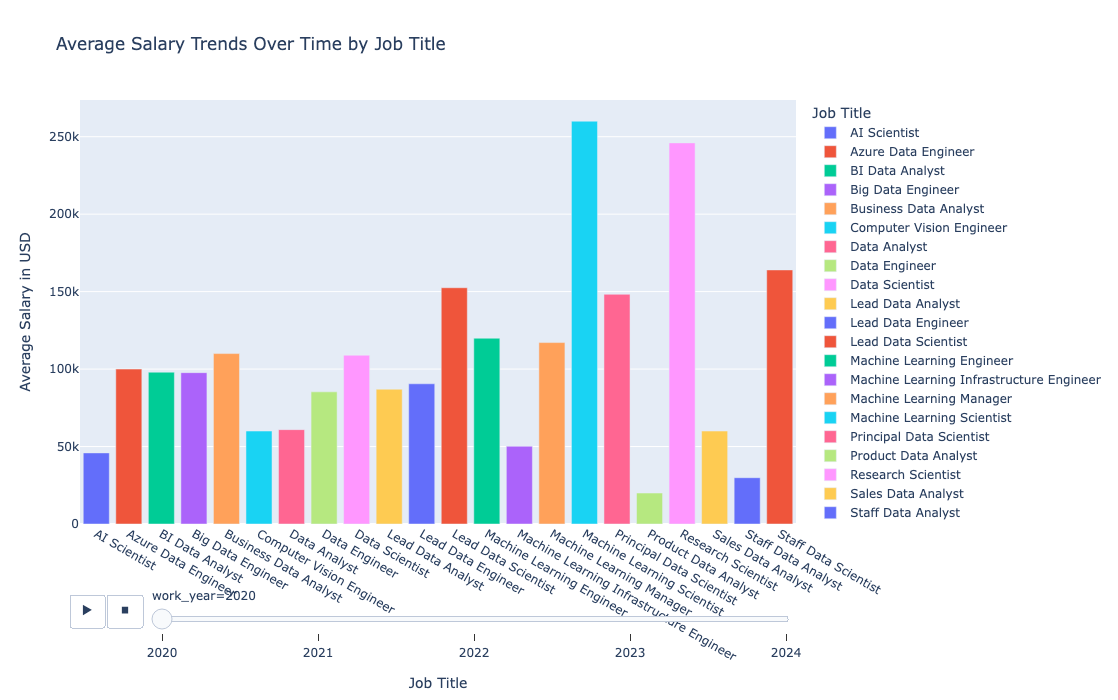

In [135]:
if 'work_year' in salaries_df.columns:
    salary_trends = salaries_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

    fig = px.bar(
        salary_trends,
        x="job_title", 
        y="salary_in_usd",
        color="job_title",
        animation_frame="work_year",
        title="Average Salary Trends Over Time by Job Title",
        labels={"job_title": "Job Title", "salary_in_usd": "Average Salary in USD"},
        template="plotly"
    )
    fig.update_layout(width=900, height=700)
    fig.show()

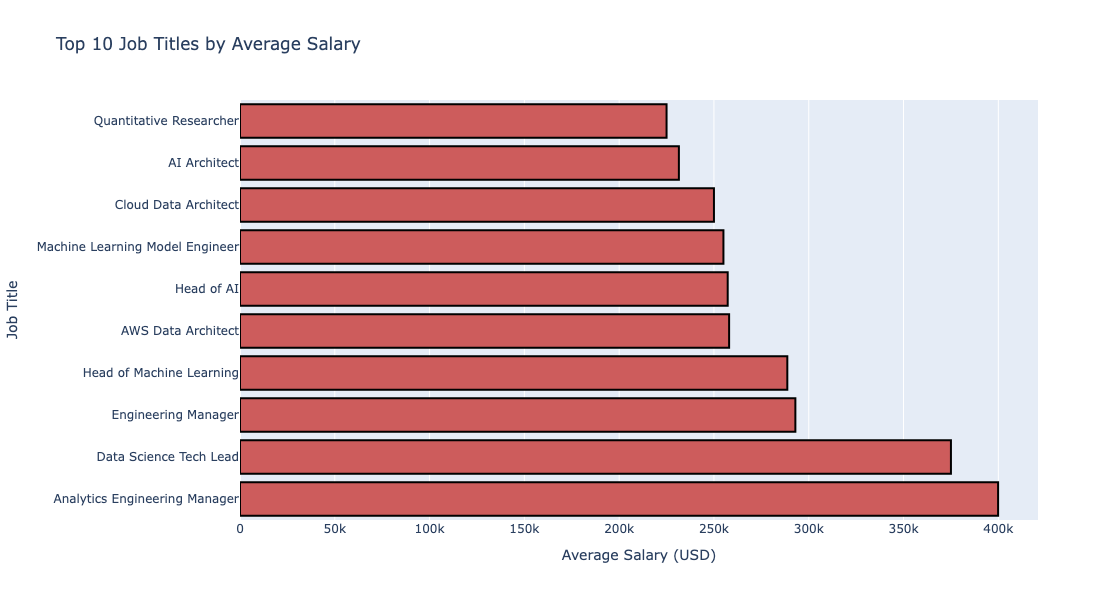

In [106]:
top_jobs = salaries_df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(
    top_jobs,
    x="salary_in_usd",
    y="job_title",
    orientation="h",
    title="Top 10 Job Titles by Average Salary",
    labels={"salary_in_usd": "Average Salary (USD)", "job_title": "Job Title"},
    template="plotly"
)

fig.update_traces(
    marker=dict(
        color="indianred",          
        line=dict(width=2, color="black") 
    )
)


fig.update_layout(width=800, height=600)
fig.show()

In [107]:
import pandas as pd
import plotly.express as px

data = pd.DataFrame({
    "location": ["Mumbai", "Bengaluru", "Delhi", "Hyderabad", "Chennai"],
    "job_count": [200, 180, 150, 120, 100],
    "average_salary": [1500000, 1400000, 1300000, 1200000, 1100000],  # INR
    "latitude": [19.0760, 12.9716, 28.7041, 17.3850, 13.0827],
    "longitude": [72.8777, 77.5946, 77.1025, 78.4867, 80.2707]
})

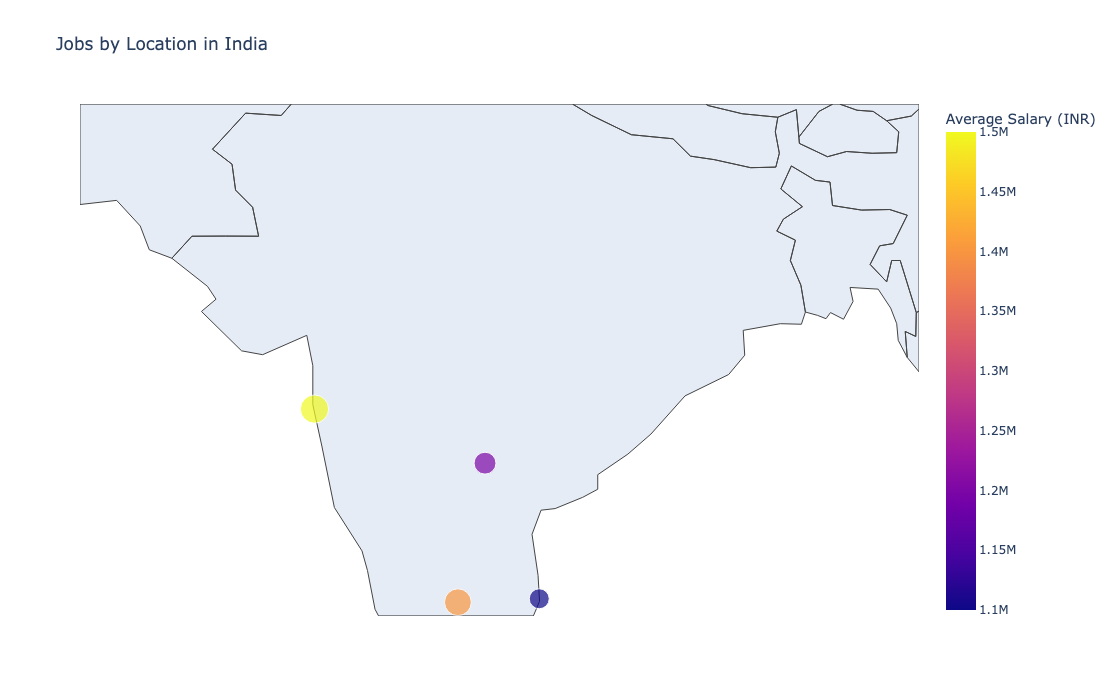

In [108]:
fig = px.scatter_geo(
    data,
    lat="latitude",
    lon="longitude",
    size="job_count", 
    color="average_salary",  
    hover_name="location",  
    title="Jobs by Location in India",
    labels={"job_count": "Job Count", "average_salary": "Average Salary (INR)"},
    template="plotly"
)

fig.update_geos(
    scope="asia",
    center={"lat": 20.5937, "lon": 78.9629},  
    projection_scale=5  
)

fig.update_layout(
    width=1000,  # Width in pixels
    height=700   # Height in pixels
)

fig.show()

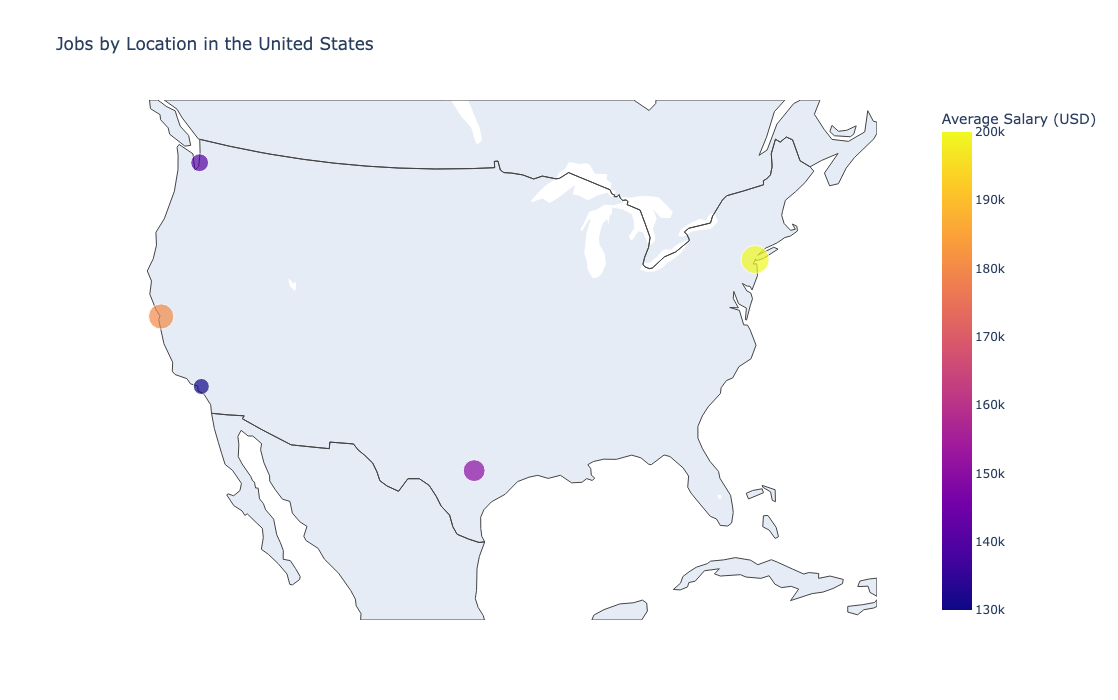

In [109]:
data = pd.DataFrame({
    "location": ["New York", "San Francisco", "Austin", "Seattle", "Los Angeles"],
    "job_count": [250, 200, 150, 100, 80],
    "average_salary": [200000, 180000, 150000, 140000, 130000],  # USD
    "latitude": [40.7128, 37.7749, 30.2672, 47.6062, 34.0522],
    "longitude": [-74.0060, -122.4194, -97.7431, -122.3321, -118.2437]
})

fig = px.scatter_geo(
    data,
    lat="latitude",
    lon="longitude",
    size="job_count",  
    color="average_salary",  
    hover_name="location",  
    title="Jobs by Location in the United States",
    labels={"job_count": "Job Count", "average_salary": "Average Salary (USD)"},
    template="plotly"
)

fig.update_geos(
    scope="north america",
    center={"lat": 37.0902, "lon": -95.7129}, 
    projection_scale=3  
)

fig.update_layout(
    width=1000,  
    height=700  
)

fig.show()